In [2]:
%run init.ipynb

# Algumas portas lógicas do IBMQ

A descrição das portas lógicas do IBMQ pode ser encontrada em https://qiskit.org/documentation/apidoc/circuit_library.html.

## Sobre kets

### Base computacional
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

### Estado geral
$$|\psi\rangle = \begin{bmatrix} c_{0} \\ c_{1} \end{bmatrix} = c_{0}\begin{bmatrix} 1 \\ 0 \end{bmatrix}+c_{1}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = c_{0}|0\rangle+c_{1}|1\rangle$$ com $c_{j}\in\mathbb{C}$

### Produto tensorial
$$|\psi\rangle\otimes|\psi'\rangle = \begin{bmatrix} c_{0} \\ c_{1} \end{bmatrix}\otimes\begin{bmatrix} c_{0}' \\ c_{1}' \end{bmatrix} = \begin{bmatrix} c_{0}c_{0}' \\ c_{0}c_{1}' \\ c_{1}c_{0}' \\ c_{1}c_{1}' \end{bmatrix}$$

## Portas lógicas de 1 qubit

### NOT ou X
$$X=\begin{bmatrix}0&1\\1&0\end{bmatrix}$$
Assim $X|0\rangle=|1\rangle$ e $X|1\rangle=|0\rangle$

### Y
$$Y=\begin{bmatrix}0&-i\\i&0\end{bmatrix}$$
Assim $Y|0\rangle=i|1\rangle$ e $Y|1\rangle=-i|0\rangle$

### Z
$$Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$$
Assim $Z|0\rangle=|0\rangle$ e $Z|1\rangle=-|1\rangle$

### Porta de Hadamard
Muda da base $\{|0\rangle,|1\rangle\}$ para a base $\{|+\rangle,|-\rangle\}$, em que $|\pm\rangle=(|0\rangle\pm|1\rangle)/\sqrt{2}$, e vice-versa:
$$H = \frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$$

### Porta $U3$ (rotação geral)
\begin{align}
U3(\theta,\phi,\lambda) & = RZ(\phi)RX(-\pi/2)RZ(\theta)RX(\pi/2)RZ(\lambda) \\
& = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}
\end{align}
Assim, e.g.,
\begin{align}
& U_{3}|0\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& U_{3}|1\rangle = -e^{i\lambda}\sin(\theta/2)|0\rangle + e^{i(\phi+\lambda)}\cos(\theta/2)|1\rangle.
\end{align}

### Porta $S$ ($S^{\dagger}$)
Essa porta lógica é representada matricialmente por
\begin{align}
S = \begin{bmatrix}1&0\\0&i\end{bmatrix}\ \therefore\ S^{\dagger} = \begin{bmatrix}1&0\\0&-i\end{bmatrix},
\end{align}
e induz uma fase $\pi/2$ no estado $|1\rangle$:
\begin{align}
S|0\rangle=|0\rangle, S|1\rangle=i|1\rangle = e^{i\pi/2}|1\rangle.
\end{align}

### Porta de fase $P$
Essa porta lógica é representada matricialmente por
\begin{align}
P(\theta) = \begin{bmatrix}1&0\\0&e^{i\theta}\end{bmatrix}
\end{align}
e induz uma fase $\theta$ no estado $|1\rangle$:
\begin{align}
P(\theta)|0\rangle=|0\rangle, P(\theta)|1\rangle = e^{i\theta}|1\rangle.
\end{align}

## Medidas

### Medidas na base $\{|0\rangle,|1\rangle\}$
Medidas nessa base, usualmente chamada de base $Z$, são implementadas diretamente no IBMQ.

### Medidas na base $\{|+\rangle,|-\rangle\}$
Notamos que
\begin{align}
Pr(+|\psi) = |\langle +|\psi\rangle|^{2} \equiv |\langle 0|H|\psi\rangle|^{2} =: |\langle 0|\psi'\rangle|^{2} = Pr(0|\psi')
\end{align}
Vemos facilmente que o análog vale para $Pr(-|\psi)=Pr(1|\psi')$, com $$|\psi'\rangle=H|\psi\rangle.$$
Portanto, medidas na base $\{|0\rangle,|1\rangle\}$, usualmente chamada de base $X$, são implementadas aplicando-se uma porta de Hadamard e subsequentemente fzendo-se medida na base $Z$.

### Medidas na base $\{|\oplus\rangle,|\ominus\rangle\}$
Temos que
\begin{align}
& S|+\rangle = (S|0\rangle+S|1\rangle)/\sqrt{2} = (|0\rangle+i|1\rangle)/\sqrt{2} = |\oplus\rangle \ \therefore \langle\oplus|=\langle+|S^{\dagger}=\langle 0|HS^{\dagger}, \\
& S|-\rangle = (S|0\rangle-S|1\rangle)/\sqrt{2} = (|0\rangle-i|1\rangle)/\sqrt{2} = |\ominus\rangle \ \therefore \langle\ominus|=\langle-|S^{\dagger}=\langle 1|HS^{\dagger}.
\end{align}
Vem assim que
\begin{align}
Pr(\oplus|\psi) = |\langle\oplus|\psi\rangle|^{2} \equiv |\langle 0|HS^{\dagger}|\psi\rangle|^{2} =: |\langle 0|\psi'\rangle|^{2} = Pr(0|\psi')
\end{align}
com 
$$|\psi'\rangle = HS^{\dagger}|\psi\rangle.$$
Analogamente, $Pr(\ominus|\psi)=Pr(1|\psi')$.

## Portas lógicas de 2 ou mais qubits

### Control-Not (CNOT=CX)
\begin{align}
CNOT_{c\rightarrow t} = |0\rangle\langle 0|\otimes \mathbb{I} +  |1\rangle\langle 1|\otimes X
\end{align}
Ação da CNOT_12
\begin{align}
& CNOT_{c\rightarrow t}|0\rangle\otimes|0\rangle = |0\rangle\langle 0||0\rangle\otimes \mathbb{I}|0\rangle +  |1\rangle\langle 1||0\rangle\otimes X|0\rangle = |0\rangle\otimes|0\rangle, \\
& CNOT_{c\rightarrow t}|0\rangle\otimes|1\rangle = |0\rangle\otimes|1\rangle, \\
& CNOT_{c\rightarrow t}|1\rangle\otimes|0\rangle = |1\rangle\otimes|1\rangle, \\
& CNOT_{c\rightarrow t}|1\rangle\otimes|1\rangle = |1\rangle\otimes|0\rangle.
\end{align}
Ou seja,
$$CNOT_{c\rightarrow t}|j\rangle\otimes|k\rangle = |j\rangle\otimes|j\oplus k\rangle$$

__Exercício:__ Descreva explicitamente a ação da CNOT na base computacional.

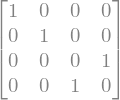

In [3]:
CX_12 = tp(proj(cb(2,0)),id(2)) + tp(proj(cb(2,1)),pauli(1)); CX_12

### SWAP (troca)

$$SWAP = CNOT_{12}\ CNOT_{21}\ CNOT_{12}$$

#### Exemplo
Considera $|\Psi\rangle = (a_{0}|0\rangle+a_{1}|1\rangle)\otimes(b_{0}|0\rangle+b_{1}|1\rangle) = a_{0}b_{0}|00\rangle + a_{0}b_{1}|01\rangle + a_{1}b_{0}|10\rangle + a_{1}b_{1}|11\rangle$. Teremos
\begin{align}
SWAP|\Psi\rangle & = a_{0}b_{0}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|00\rangle + a_{0}b_{1}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|01\rangle \\
& \ + a_{1}b_{0}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|10\rangle + a_{1}b_{1}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|11\rangle \\
& = a_{0}b_{0}CNOT_{12}\ CNOT_{21}|00\rangle + a_{0}b_{1}CNOT_{12}\ CNOT_{21}|01\rangle \\
& \ + a_{1}b_{0}CNOT_{12}\ CNOT_{21}|11\rangle + a_{1}b_{1}CNOT_{12}\ CNOT_{21}|10\rangle \\
& = a_{0}b_{0}CNOT_{12}|00\rangle + a_{0}b_{1}CNOT_{12}|11\rangle + a_{1}b_{0}CNOT_{12}|01\rangle + a_{1}b_{1}CNOT_{12}|10\rangle \\
& = a_{0}b_{0}|00\rangle + a_{0}b_{1}|10\rangle + a_{1}b_{0}|01\rangle + a_{1}b_{1}|11\rangle \\
& = (b_{0}|0\rangle + b_{1}|1\rangle)\otimes a_{0}|0\rangle + (b_{0}|0\rangle + b_{1}|1\rangle)\otimes a_{1}|1\rangle \\
& = (b_{0}|0\rangle + b_{1}|1\rangle)\otimes(a_{0}|0\rangle + a_{1}|1\rangle).
\end{align}

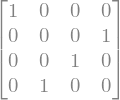

In [8]:
CX_21 = tp(id(2),proj(cb(2,0))) + tp(pauli(1),proj(cb(2,1))); CX_21

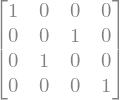

In [9]:
SWAP = CX_12*CX_21*CX_12; SWAP

### Z controlada
$$C_{Z}^{1\rightarrow 2} = |0\rangle\langle 0|\otimes \mathbb{I} +  |1\rangle\langle 1|\otimes Z$$
Pode-se verificar que $C_{Z}^{1\rightarrow 2}=C_{Z}^{2\rightarrow 1}=:C_{Z}.$

Lembrado, $X$ troca estados da base computacional e $Z$ faz isso para a base $\{|+\rangle,|-\rangle\}$. Podemos assim obter a Cx da Cz e vice versa. Por exemplo, se mudamos para a base $\{|+\rangle,|-\rangle\}$, aplicamos Cz e voltamos para a base computacional, isso será equivalente a uma CNOT na base padrão:
$$C_{X}^{1\rightarrow 2} = (I\otimes H)C_{Z}^{1\rightarrow 2}(I\otimes H).$$
Do mesmo modo
$$C_{Z} = (I\otimes H)C_{X}^{1\rightarrow 2}(I\otimes H).$$

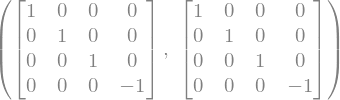

In [8]:
Cz = tp(proj(cb(2,0)), id(2)) + tp(proj(cb(2,1)), pauli(3)); Cz_12 = Cz
Cz_21 = tp(id(2),proj(cb(2,0))) + tp(pauli(3),proj(cb(2,1)))
Cz_12, Cz_21

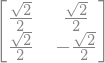

In [6]:
H = (1/sqrt(2))*Matrix([[1,1],[1,-1]]); H

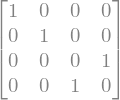

In [10]:
Cx12 = tp(id(2),H)*Cz*tp(id(2),H); Cx12

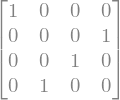

In [9]:
Cx21 = tp(H,id(2))*Cz*tp(H,id(2)); Cx21

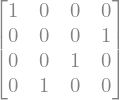

In [13]:
CX_21 = tp(id(2),proj(cb(2,0))) + tp(pauli(1),proj(cb(2,1))); CX_21

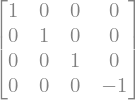

In [14]:
Cz12 = tp(id(2),H)*Cx12*tp(id(2),H); Cz12

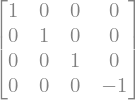

In [15]:
Cz21 = tp(id(2),H)*Cx21*tp(id(2),H); Cz12

U controlada
$$CU(\theta,\phi,\lambda,\gamma) = |0\rangle\langle 0 |\otimes I + |1\rangle\langle 1|\otimes e^{i\gamma}U(\theta,\phi,\lambda).$$

Porta de Toffolli
$$C_{CX} = |0\rangle\langle 0|\otimes I_{4} + |1\rangle\langle 1|\otimes C_{x}$$

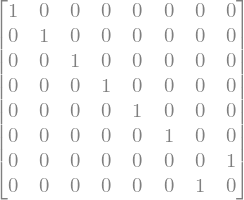

In [12]:
CCX = tp(proj(cb(2,0)),id(4)) + tp(proj(cb(2,1)),Cx12); CCX